# Центральная предельная теорема своими руками

### Импорт библиотек и модулей

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import scipy.stats as sts

### Определение начальных параметров и генерация выборки

#### Распределение хи-квадрат

Распределение хи-квадрат описывает сумму квадратов случайных величин, каждая из которых распределена по стандартному нормальному закону. Зависит от числа степеней свободы. (В данном случае это df)

In [46]:
df = 6

In [47]:
r = chi2.rvs(df, size=1000)

### Построение гистограммы и теоретического графика плотности распределения

Text(0.5, 0, '$x$')

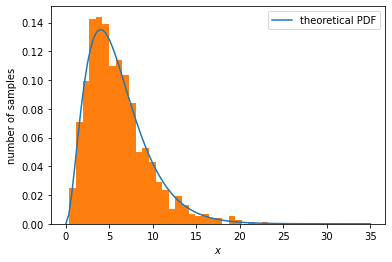

In [48]:
#График
x = np.linspace(0,35,100)
pdf = sts.chi2(df).pdf(x)
plt.plot(x, pdf, label='theoretical PDF')
plt.legend(loc='upper right')

#Гистограмма
plt.hist(r, bins = 30, density=True,)
plt.ylabel('number of samples')
plt.xlabel('$x$')

### Функция, которая строит гистограмму и функцию плотности соответствующего нормального распределения

In [62]:
def av_dist(n):
    dist = [np.mean(sts.chi2(df).rvs(n)) for x in range(1000)]
    
    #График плостности нормального распределения
    std = chi2.std(df) #std - стандартное отклонение = корень из дисперсии
    Dn = math.sqrt(std**2 / n) #Dn = sqrt(D/n), так как функция принимает на вход стандартное отклонение
    x = np.linspace(0,12,100)
    pdf = sts.norm(loc=np.mean(dist),scale=Dn).pdf(x)
    plt.plot(x, pdf, label='theoretical PDF')
    
    #Гистограмма
    plt.hist((dist), density=True, bins = 30)
    plt.ylabel('number of samples')
    plt.xlabel('$x$')

### Запускаем функцию для 3-х разных значений объёмов выборок

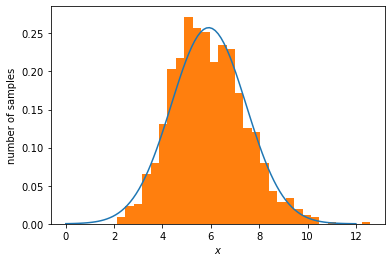

In [63]:
av_dist(5)

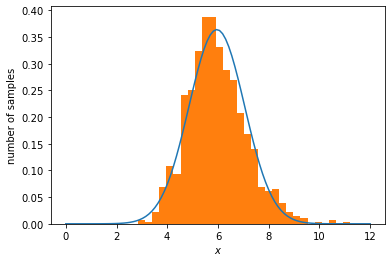

In [51]:
av_dist(10)

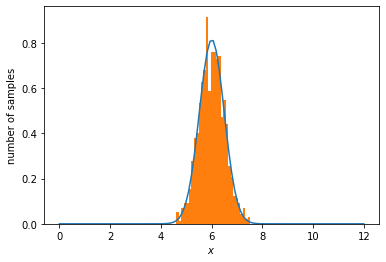

In [52]:
av_dist(50)

### Вывод

С увеличением числа n гистограмма всё больше похожа на нормальное распределение, то есть точность аппроксимации 
распределения выборочных средних нормальным с ростом n увеличивается